# Tank Sizing Python Code for Propellants and Pressurant Using Assumptions
### Note: Only N2 for pressurant, LOX for oxidizer, and kerosene for fuel (SO FAR)
### Note: Only isothermal assumption coded (SO FAR)

In [114]:
import math
import numpy as np
import time

import warnings
warnings.filterwarnings('ignore')

# LOX Tank Volume Calculator
### Note: Density as a function of temperature and pressure yet to be implemented
Density taken at boiling point of O2

In [115]:
burntime=10 # seconds
ullageRatio=1.15 # percentage of tank that is ullage
density=1097.26 #kg/m^3
massflow_ox = 1.15 #kg/s

def loxVolumeCalc(burntime, massflow_ox, ullageRatio):
    mass=burntime*massflow_ox
    volume=mass/density
    volumeFinal=volume*ullageRatio
    print("lox massflow = " + str(massflow_ox) + " kg/s")
    print("lox massflow = " + str(massflow_ox*2.20462) + " lb/s")
    print("lox mass = " + str(mass) + " kg")
    print("lox mass = " + str(mass*2.20462) + " lb")
    print("lox tank volume = " + str(volumeFinal) + " m^3")
    print("lox tank volume = " + str(volumeFinal*35.3147) + " ft^3")

    return volume
    
loxVolume = loxVolumeCalc(burntime,massflow_ox,ullageRatio)

lox massflow = 1.15 kg/s
lox massflow = 2.5353129999999995 lb/s
lox mass = 11.5 kg
lox mass = 25.353129999999997 lb
lox tank volume = 0.012052749576217122 m^3
lox tank volume = 0.4256392354592348 ft^3


# Kerosene Tank Volume Calculator
### Note: Density as a function of temperature and pressure yet to be implemented
Density taken at room temp. (298 K)

In [116]:
burntime=10 # seconds
OF=2.2 # Oxidizer to Fuel ratio
ullageRatio=1.15 # percentage of tank that is ullage
density=820 #kg/m^3
massflow_fu=massflow_ox/OF #kg/s

def keroVolumeCalc(burntime, massflow_fu, ullageRatio):
    mass=massflow_fu*burntime
    volume=mass/density
    volumeFinal=volume*ullageRatio
    print("kerosene massflow = " + str(massflow_fu) + " kg/s")
    print("kerosene massflow = " + str(massflow_fu*2.20462) + " lb/s")
    print("kerosene mass = " + str(mass) + " kg")
    print("kerosene mass = " + str(mass*2.20462) + " lb")
    print("kerosene tank volume = " + str(volumeFinal) + " m^3")
    print("kerosene tank volume = " + str(volumeFinal*35.3147) + " ft^3")

    return volume
    
keroVolume = keroVolumeCalc(burntime,massflow_fu,ullageRatio)

kerosene massflow = 0.5227272727272726 kg/s
kerosene massflow = 1.1524149999999995 lb/s
kerosene mass = 5.227272727272726 kg
kerosene mass = 11.524149999999995 lb
kerosene tank volume = 0.0073309312638580905 m^3
kerosene tank volume = 0.2588896383037693 ft^3


# Tank Height Needed to House Propellant (With Ellipsoidal Ends)
### Note: Please adjust which volume you are looking for by setting propVolume equal to either keroVolume or loxVolume
### Note: If tank thickness is known, please subtract this value from the total radius of the rocket when inputting radius. This calculator does not account for thickness.
### Note: 

In [117]:
semi_axis=1 #in
radius=3 #in
propVolume=keroVolume #m^3 (ullage ratio factored in from volume functions)
propVolume=propVolume * 35.3147 #converts m^3 to ft^3 in order to be inputted

def elpsTankHeight(semi_axis,radius, propVolume):
    propVolume=propVolume*12**3 #ft^3 to in^3
    print("propellant tank volume " + str(propVolume) + " in^3")
    elpsCapVolume=2*2/3*math.pi*radius**2*semi_axis #volume of both caps combined
    print("volume of ellipsoidal caps = " + str(elpsCapVolume) + " in^3")
    elpsTankHeight=(propVolume - elpsCapVolume)/math.pi/radius**2 #solve for tank height in between caps
    print("cylinder tank height for 6 in diameter with " + str(semi_axis) + " in ellipsoidal caps is: " + str(elpsTankHeight) + " in")

elpsTankHeight(semi_axis, radius, propVolume)

propellant tank volume 389.0098217294899 in^3
volume of ellipsoidal caps = 37.69911184307752 in^3
cylinder tank height for 6 in diameter with 1 in ellipsoidal caps is: 12.425074675454516 in


# Pressurant Tank Volume Functions

### Note: Compressibility and Volume Functions only run with at least two pressure values inputted, if you only want to try a single pressure use P=np.ones(2)*(pressure)
### Note: Pressure must input in psi, Temperature must be input in Kelvin, mass must be in kg

## Relations:

We have three states of N2: (1) The initial state (i) of the N2 inside the pressurant tank before fire, (2) The state of the N2 leftover (L) in the pressurant tank after the fire, (3) and the state of the N2 that has displaced (D) into the propellant tanks.

Assumptions:

- Mass flow of propellants are constant
- Volumetric flow of N2 constant

Known variables:

$ V_F = ... m^3 $ Volume of fuel tank \
$ V_O = ... m^3 $ Volume of the oxidizer tank \
$ C_{backflow} = \frac{P_L}{P_{propellant}} = 1.15 $ Ratio between leftover N2 pressure and propellant pressure  \
$ P_{propellant} = 600 psi $ \
$ P_L = P_{propellant} C_{backflow} = 690 psi $ Pressure of leftover N2 \
$ P_D = P_{propellant} = 600 psi $ Pressure of displaced N2 \
$ R = 8.314 \frac{J}{mol \cdot K} $ \
$ M_{N2} = 28.01 [\frac{kg}{kmol}] \cdot \frac{1}{1000}[\frac{kmol}{mol}] = 0.02801 [\frac{kg}{mol}] $ \
$ T_i = 298 K $ Initial temperature of N2 tank \
$ t_b = 10 s $ Burntime

Unknown Variables:

$ V_{N2} = $ Volume of pressurant tank \
$ n_t = n_L + n_D = $ Total moles of N2 \
$ T_L $ Temperature of leftover N2 \
$ T_D $ Temperature of displaced N2 \
$ P_i $ Initial N2 pressure

## *Fundamentals of Engineering Thermodynamics, 8th Edition*

Redlich-Kwong Equation:

$$ P = \frac{\bar{R}T}{\bar{v}-b} - \frac{a}{\bar{v}(\bar{v}+b)T^{1/2}} $$

Table A-1:

$$ M_{N2} = 0.02801 [\frac{kg}{mol}] $$

Table A-24:

$$ a_{N2} = 15.53 [bar \frac{m^6}{kmol^2} K^{1/2}] \cdot \frac{1 [kmol^2]}{1e6 [mol^2]} \cdot \frac{1e5 [Pa]}{1[bar]} = 1.553 [Pa \frac{m^6}{mol^2} K^{1/2}] $$

$$ b_{N2} = 0.02677 [\frac{m^3}{kmol}] \cdot \frac{1 [kmol]}{1000 [mol]} = 2.677e-5 [\frac{m^3}{mol}] $$

Additionally:
$$ \bar{R} = 8.314 [\frac{J}{mol \cdot K}] $$
$$ \bar{v} = \frac{V}{n} [\frac{m^3}{mol}] $$
$$ n_t = n_L + n_D $$

Variables that can be set as a constraint:

$ P_i $ Maximum Initial Pressure \
$ T_D $ Safe Minimum N2 Temperature

Equation 1: \
$ P = P_i $ \
$ T = T_i $ \
$ \bar{v} = \frac{V_{N2}}{n_t} $

$$ P_i = \frac{\bar{R}T_i}{\frac{V_{N2}}{n_t}-b} - \frac{a}{\frac{V_{N2}}{n_t}(\frac{V_{N2}}{n_t}+b)T_{i}^{1/2}} $$

Equation 2: \
$ P = P_L $ \
$ T = T_L $ \
$ \bar{v} = \frac{V_{N2}}{n_L} $

$$ P_L = \frac{\bar{R}T_L}{\frac{V_{N2}}{n_L}-b} - \frac{a}{\frac{V_{N2}}{n_L}(\frac{V_{N2}}{n_L}+b)T_{L}^{1/2}} $$

Equation 3: \
$ P = P_D $ \
$ T = T_D $ \
$ \bar{v} = \frac{V_F + V_O}{n_D} $

$$ P_D = \frac{\bar{R}T_D}{\bar{\frac{V_F + V_O}{n_D}}-b} - \frac{a}{\frac{V_F + V_O}{n_D}(\bar{\frac{V_F + V_O}{n_D}}+b)T_{L}^{1/2}} $$

## Functions:

In [118]:
V_F = keroVolume
V_O = loxVolume
V_P = V_F + V_O
C_backflow = 1.15
P_L = 600 * C_backflow * 6894.76
P_D = 600 * 6894.76
R = 8.314
M_N2 = 0.02801
T_i = 298.15
t_b = 10.0

# Isothermal Assumption
$$ T_i = T_L = T_D = T $$

Equation 3 gives us $n_D$ which will allow us to relate Equations 1 & 2 between three unknowns $P_i$, $V_{N2}$ and $n_L$. The diffused mass (moles) is constant and doesn't depend on any variables besides the volume of the propellant tanks and the pressure inside the propellant tanks.

By setting an initial pressure constraint, or guessing it, we can solve the non-linear equation for the tank volume.

The code below: (1) finds $n_D$ using iterative method, (2) calculates $V_{N2}$ and $n_L$ simultaneously using iterative method 6 times based on 6 chosen initial pressures (1000 to 6000 psi), and (3) fits a spline to these values.

In [119]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

T_D = T_i
T_L = T_i

a = 1.553
b = 2.677e-5

def n2displaced(n_D):
    return -P_D + R * T_D / ( ( V_P ) / n_D - b ) \
    - a / ( ( V_P ) / n_D * ( ( V_P ) / n_D + b )* T_D**(1/2) )

initial_guess = 1

n_D = fsolve(n2displaced, initial_guess)

print('displaced N2 mass (kg) = {}'.format(n_D*M_N2))
print('residual = {}'.format(n2displaced(n_D)))

displaced N2 mass (kg) = [0.79689339]
residual = [-1.30967237e-09]


### Example Run Using Initial Pressure of 6000 psi

In [120]:
P_i = 6000 * 6894.76

n_D = float(n_D)

def n2initial_leftover(vars):
    V_N2, n_L = vars
    initial = -P_i + R * T_i / ( V_N2 / ( n_L + n_D ) - b ) \
    - a / ( V_N2 / ( n_L + n_D ) * ( V_N2 / ( n_L + n_D ) + b ) * T_D**0.5 )
    leftover = -P_L + R * T_L / ( V_N2 / n_L - b ) \
    - a / ( V_N2 / n_L * ( V_N2 / n_L + b ) * T_D**0.5 )
    return [initial, leftover]

initial_guess = [0.005, 5]

V_N2, n_L = fsolve(n2initial_leftover, initial_guess)

n_t = n_L + n_D

V_N2_liters = 1000 * V_N2

m_D = n_D * M_N2

m_L = n_L * M_N2

m_t = n_t * M_N2

print('N2 tank volume (L) = {}'.format(V_N2_liters))
print('displaced N2 mass (kg) = {}'.format(m_D))
print('leftover N2 mass (kg) = {}'.format(m_L))
print('total N2 mass (kg) = {}'.format(m_t))

N2 tank volume (L) = 2.4157379730467046
displaced N2 mass (kg) = 0.7968933886737763
leftover N2 mass (kg) = 0.1314598025810205
total N2 mass (kg) = 0.928353191254797


## ISOTHERMAL VOLUME / MASS OUTPUT
### NOTE: Due to the nature of the equations, volume and mass follow the same exact non-dimensionalized shape. They are both plotted below, and while there appears to be one curve, they overlap. 

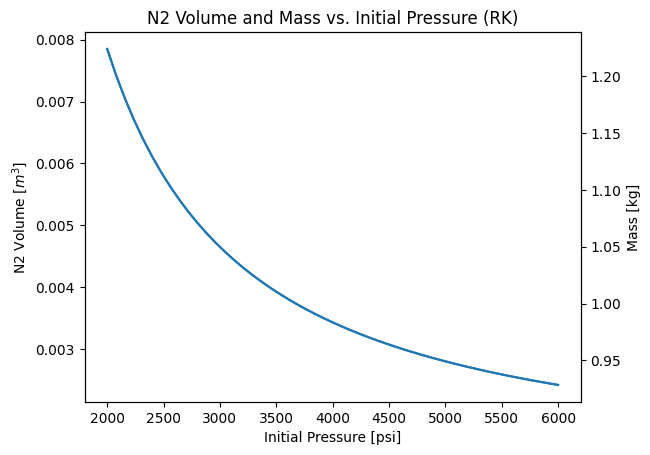

In [121]:
P = np.linspace(2000, 6000, 51)    # Run loop for 51 values of initial pressure
M = np.zeros(len(P))
V = np.zeros(len(P))                # Store volume values on each run

for i in range(0,len(P)):
    P_i = P[i] * 6894.76
    initial_guess = [0.005, 5]                              # Changing guess will not change final answer
    V_N2, n_L = fsolve(n2initial_leftover, initial_guess)
    V[i] = V_N2
    M[i] = (n_L + n_D) * M_N2

x = P
y1 = V
y2 = M

V_RK = V

# Left y-axis
fig, ax1 = plt.subplots()
ax1.plot(x, y1)
ax1.set_xlabel('Initial Pressure [psi]')
ax1.set_ylabel('N2 Volume [$m^3$]')
ax1.tick_params('y')

# Right y-axis
ax2 = ax1.twinx()
ax2.plot(x, y2)
ax2.set_ylabel('Mass [kg]')
ax2.tick_params('y')

plt.title('N2 Volume and Mass vs. Initial Pressure (RK)')
plt.show()

# Ideal Gas Validation
The only easy way to validate the Redlich-Kwong isothermal assumption is by comparing to the isothermal ideal gas assumption.

All temperatures $ = T_i $.

$$ P_i V_{N2} = n_t R T_i $$
$$ P_L V_{N2} = n_L R T_i $$
$$ P_D (V_F + V_O) = n_D R T_i $$

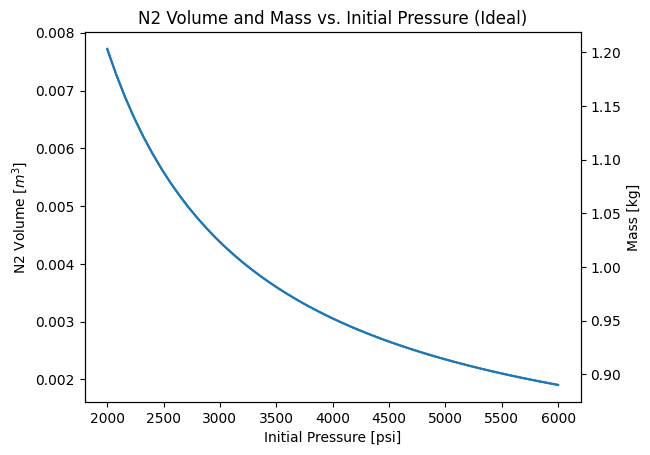

In [122]:
T = T_i

n_D = P_D * (V_F + V_O) / (R * T)

def n2initial_leftover(vars):
    V_N2, n_L = vars
    initial = (n_D + n_L) * R * T / (P_i * V_N2) - 1
    leftover = n_L * R * T / (P_L * V_N2) - 1
    return [initial, leftover]

P = np.linspace(2000, 6000, 51)    # Run loop for 51 values of initial pressure
M = np.zeros(len(P))
V = np.zeros(len(P))                # Store volume values on each run

for i in range(0,len(P)):
    P_i = P[i] * 6894.76
    initial_guess = [0.005, 5]                              # Changing guess will not change final answer
    V_N2, n_L = fsolve(n2initial_leftover, initial_guess)
    V[i] = V_N2
    M[i] = (n_L + n_D) * M_N2

x = P
y1 = V
y2 = M

V_Ideal = V

# Left y-axis
fig, ax1 = plt.subplots()
ax1.plot(x, y1)
ax1.set_xlabel('Initial Pressure [psi]')
ax1.set_ylabel('N2 Volume [$m^3$]')
ax1.tick_params('y')

# Right y-axis
ax2 = ax1.twinx()
ax2.plot(x, y2)
ax2.set_ylabel('Mass [kg]')
ax2.tick_params('y')

plt.title('N2 Volume and Mass vs. Initial Pressure (Ideal)')
plt.show()

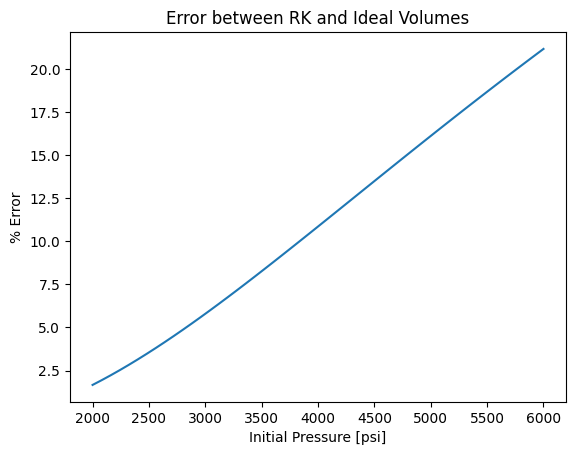

In [123]:
Error = (V_RK - V_Ideal)/V_RK * 100

plt.plot(P, Error)
plt.title('Error between RK and Ideal Volumes')
plt.xlabel('Initial Pressure [psi]')
plt.ylabel('{} Error'.format('%'))
plt.show()